# Importing necessary libraries

In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Analysis dataset

In [306]:
df = pd.read_csv('Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [308]:
df.isnull().sum()

,0
No,0
X1 transaction date,0
X2 house age,0
X3 distance to the nearest MRT station,0
X4 number of convenience stores,0
X5 latitude,0
X6 longitude,0
Y house price of unit area,0


In [309]:
correlation = df.corr().round(2)

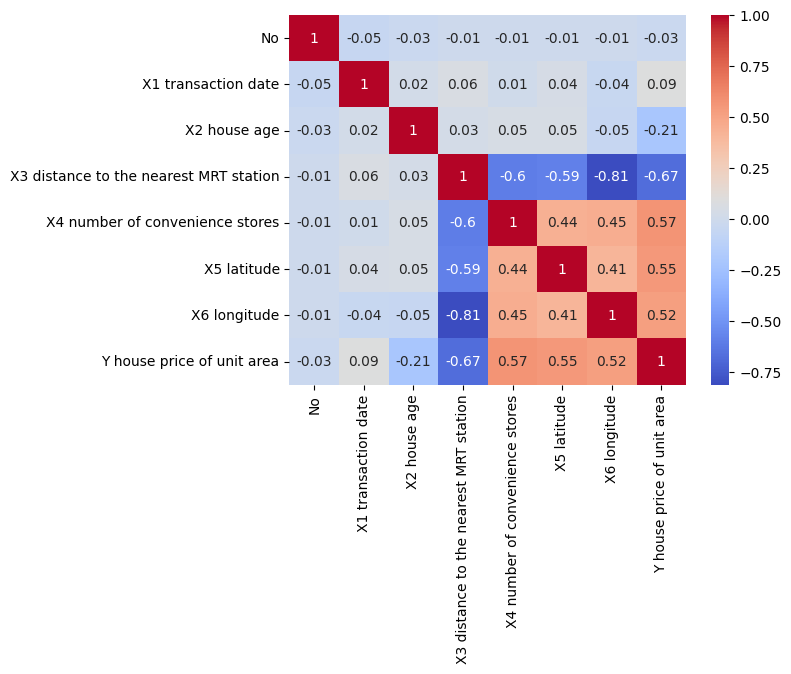

In [310]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [311]:
df.drop(['No','X1 transaction date'],axis=1,inplace=True)
df.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


# Feature separation
- X = Independent Features
- y = Target feature

In [312]:
X = df.drop('Y house price of unit area',axis=1)
y = df['Y house price of unit area']

In [313]:
type(X),type(y) # X must be in dataframe or 2d array

(pandas.core.frame.DataFrame, pandas.core.series.Series)

# Exploratory Data Analysis (EDA)

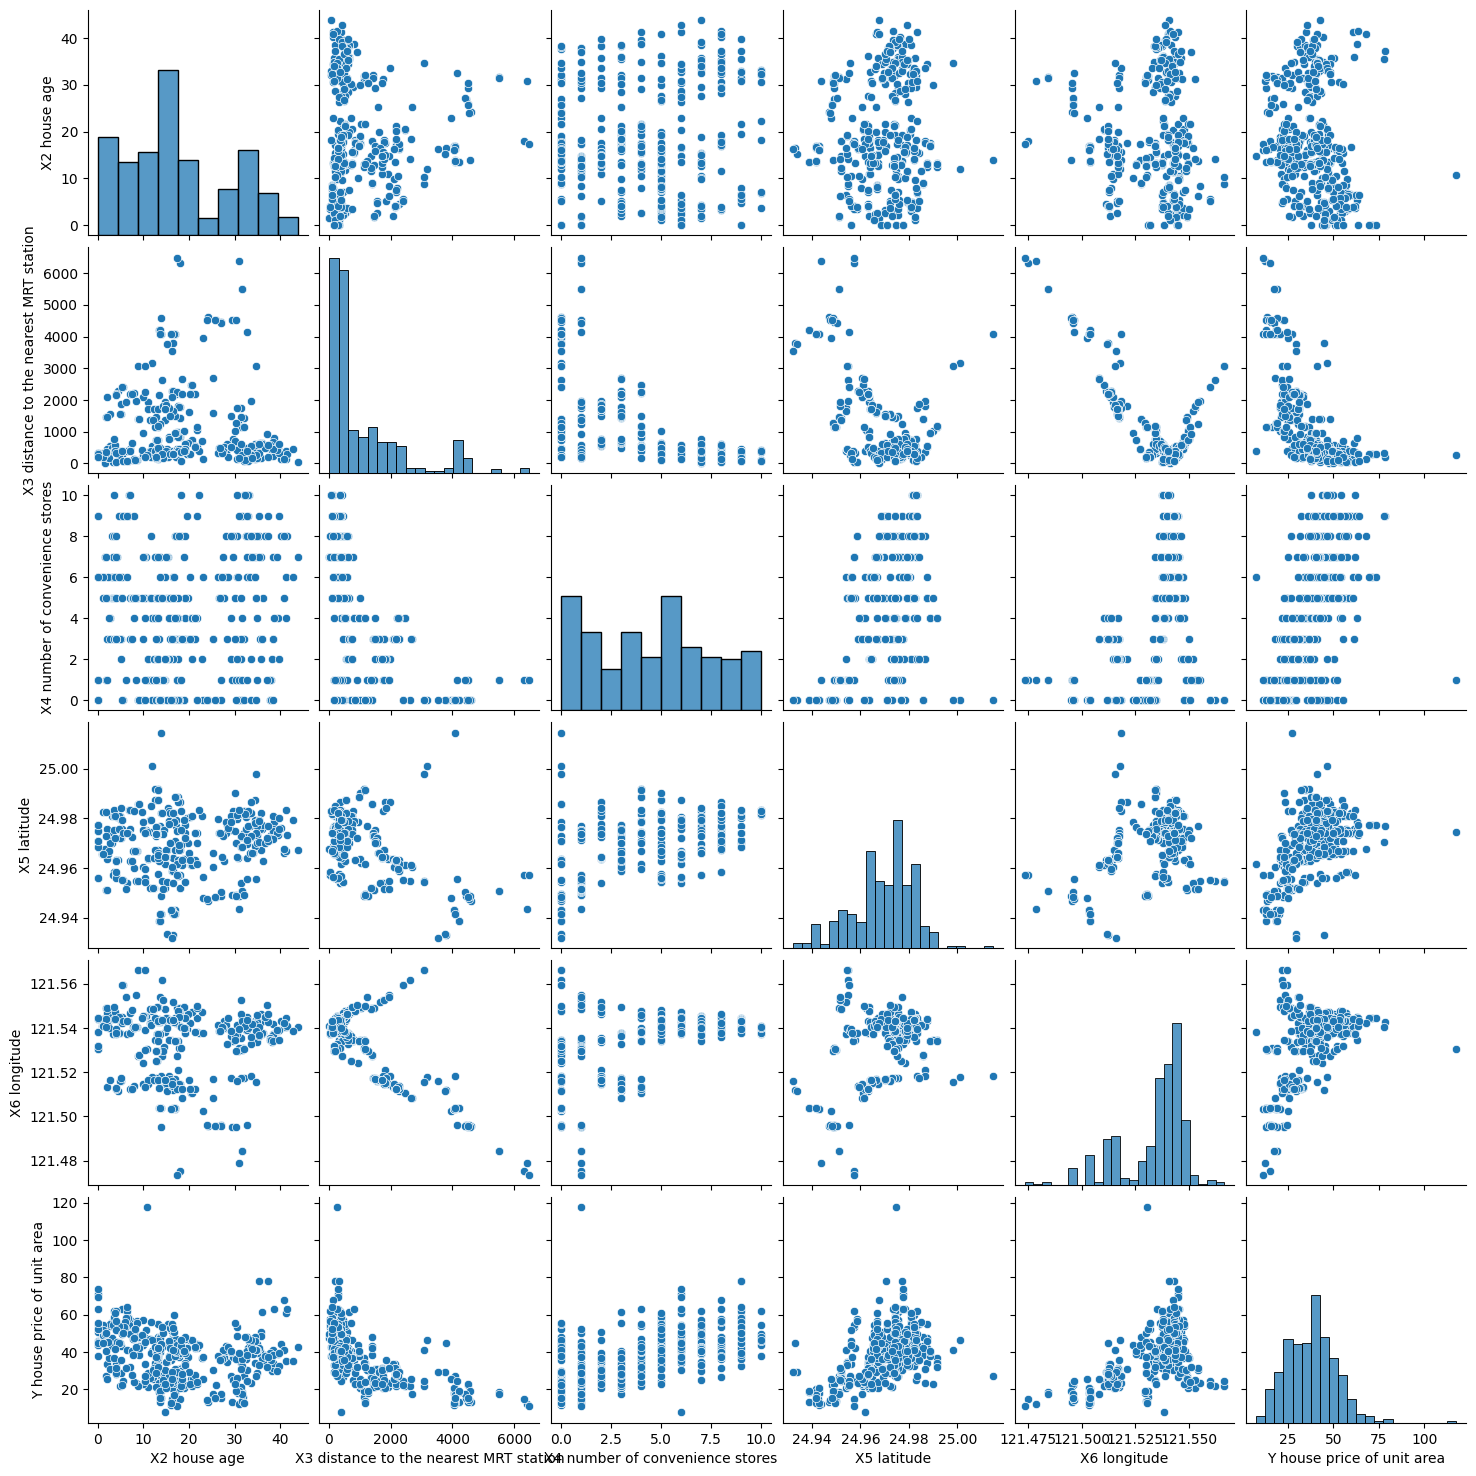

In [314]:
sns.pairplot(df)

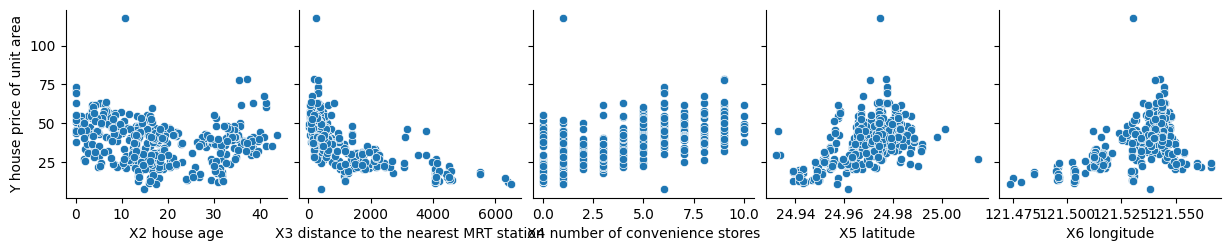

In [315]:
sns.pairplot(data=df, x_vars= X.columns, y_vars=['Y house price of unit area'])
plt.show()

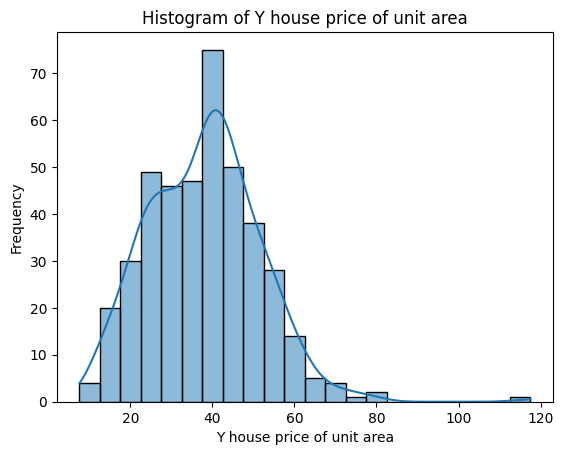

In [316]:
sns.histplot(df['Y house price of unit area'],kde=True)
plt.xlabel('Y house price of unit area')
plt.ylabel('Frequency')
plt.title('Histogram of Y house price of unit area')
plt.show()

# Data Splitting

In [317]:
from sklearn.model_selection import train_test_split

In [318]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [319]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((331, 5), (83, 5), (331,), (83,))

# Scalling data using StandardScaler

In [320]:
from sklearn.preprocessing import StandardScaler
scale_X = StandardScaler()
X_train = scale_X.fit_transform(X_train) # fitting and transforming train data
X_test = scale_X.transform(X_test) # transforming testing data

# Importing algorithms

In [321]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# Making function for evalution the model

In [322]:
def performance(y_t,y_p):
  mse = mean_squared_error(y_t, y_p)
  rmse = (np.sqrt(mean_squared_error(y_t, y_p)))
  r2 = r2_score(y_t, y_p)
  rmse = (np.sqrt(mean_squared_error(y_t, y_p)))
  print(f'MSE is {"%0.2f"% mse}')
  print(f'RMSE is {"%0.2f"% rmse}')
  print(f'R2 score is {"%0.2f"% r2}')

# Multiple Linear regression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

In [324]:
validation = cross_val_score(estimator=lin_reg, X=X_train, y=y_train,cv=10,scoring='neg_mean_squared_error')
validation

avg_mse = - np.mean(validation)
avg_mse

88.37966183900305

In [325]:
#prediction on test set
y_pred = lin_reg.predict(X_test)
y_pred

array([47.74180481, 41.95484652, 44.5399885 , 41.33697932, 30.28548   ,
       42.84474934, 45.98717123, 45.90599326, 24.78369465, 52.02068924,
       32.23880597, 34.77542016, 39.51392044, 24.90203898, 35.73984968,
       32.99552705, 41.96863217, 46.98662328, 31.50100311, 44.49258341,
        2.21362693, 33.64381059, 47.764103  , 43.56374399, 14.07301949,
       41.29883092, 14.73315281, 44.5399885 , 36.13972668, 37.76019401,
       11.66211419, 39.22848089, 37.83881729, 28.61334713, 45.93500741,
       31.52925298, 52.2101045 , 15.18188713, 46.84531477, 40.47464938,
       36.01694465, 40.58052131, 48.38869976, 39.8943259 , 42.00896517,
       48.22742934, 45.07252677, 23.5290158 , 49.9849698 , 48.13933326,
       47.74180481, 48.54209921, 40.94754085, 42.54642454, 36.38766353,
       15.15482781, 35.13348041, 36.39866246, 30.20430203, 45.90599326,
       33.69672647, 32.65567761, 15.15482781, 11.8739673 ,  8.74877596,
       33.67086991, 29.81801432, 45.24751413, 34.2425491 , 30.54

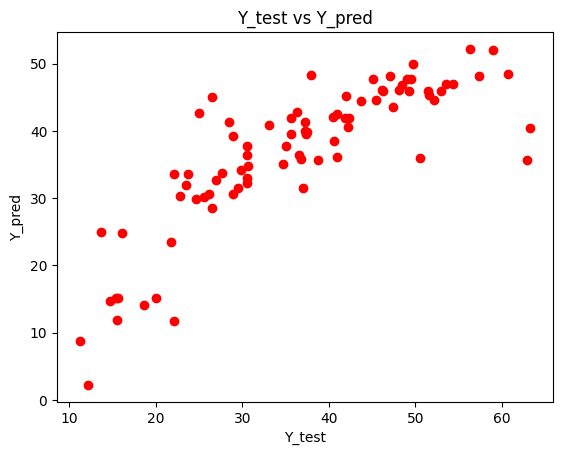

In [326]:
plt.scatter(y_test,y_pred,color='red')
plt.title('Y_test vs Y_pred')
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.show()

### Evaluation of Linear regression model

In [327]:
#------------------------ model evaluation for training set--------------------
y_train_predict = lin_reg.predict(X_train)

print("The model performance for training set")
# calling function
evaluation_train = evalution(y_train, y_train_predict)
evaluation_train

print('\n')
#------------------------ model evaluation for testing set--------------------

mse = mean_squared_error(y_test, y_pred)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
evaluation_test= evalution(y_test, y_pred)
evaluation_test

The model performance for training set
MSE is 85.43
RMSE is 9.24
R2 score is 0.55


The model performance for testing set
--------------------------------------
MSE is 54.58
RMSE is 7.39
R2 score is 0.67


# Polynomial Regression Model

In [328]:
#Initialization
ploy_reg = PolynomialFeatures(degree=2)
X_train_poly = ploy_reg.fit_transform(X_train)
X_test_poly = ploy_reg.transform(X_test)

In [ ]:
 # Create a new LinearRegression object
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_poly, y_train)

In [336]:
#prediction on test dataset
y_pred_poly = lin_reg_poly.predict(X_test_poly)
y_pred_poly.shape

(83,)

### Performance evaluation

In [350]:
y_pred_train = lin_reg_poly.predict(X_train_poly)

#------------------------ model evaluation for training set--------------------

print("The model peformance for training  dataset")
print("-----------------------------------------")
# Calling function
performance(y_train,y_pred_train)

print('\n')
#------------------------ model evaluation for testing set--------------------

print("The model peformance for testing dataset")
print("-----------------------------------------")
# Calling function
performance(y_test,y_pred_poly)

The model peformance for training  dataset
-----------------------------------------
MSE is 62.43
RMSE is 7.90
R2 score is 0.67


The model peformance for testing dataset
-----------------------------------------
MSE is 41.85
RMSE is 6.47
R2 score is 0.75


# **Making Function of polynomial regression model with adjusting degree**

In [352]:
def poly_degree(degree):

    # initializing polynomial feature for converting to polynomial
    ploy_reg = PolynomialFeatures(degree=degree)
    X_train_poly = ploy_reg.fit_transform(X_train)
    X_test_poly = ploy_reg.transform(X_test)

    # Create a new LinearRegression object
    lin_reg_poly = LinearRegression()

    # fitting on train dataste
    lin_reg_poly.fit(X_train_poly, y_train)

    # Prediction on test dataset
    y_pred_poly = lin_reg_poly.predict(X_test_poly)
    print('predicted value(y_pred_poly):')
    print(y_pred_poly)
    print("\n")

    print("The model peformance for testing dataset")
    print("-----------------------------------------")
    # calling evauation function
    perform = performance(y_test, y_pred_poly)
    return perform

In [353]:
# calling function
deg = poly_degree(3)
deg

predicted value(y_pred_poly):
[50.39740158 36.19723388 46.83345059 46.54559046 24.50092635 42.41867152
 49.62458022 49.45604168 14.5819803  56.09867341 26.33035212 29.71111504
 29.22556665 15.41651845 38.59169569 26.79273703 44.68594133 53.58963031
 25.89442121 38.90241707 -3.85782106 24.32470451 51.65634    39.83277211
 18.15847757 46.48465966 17.30161677 46.83345059 35.19692884 29.88074097
 17.31045309 29.08495529 37.67735603 27.75827985 46.72791056 40.23336619
 56.82353628 17.86662632 46.09281679 52.83531655 35.55710356 41.68457734
 49.80344287 46.91340053 36.24828035 52.66726882 34.57428949 19.41210001
 56.02582909 50.20101208 50.39740158 54.81175799 38.34641416 39.5528287
 39.11430321 17.85146245 36.71480012 15.13640405 24.58135385 49.45604168
 26.84387469 19.08023429 17.85146245 18.93325543 17.71403231 24.33764968
 27.38743289 31.86675693 38.23542402 27.30614758 45.12430242 40.90307816
 53.48586566 47.18527062 37.48302653 47.23957516 42.27269157 38.4478616
 32.66148874 28.2013713

**We can observe that the error has reduced after using polynomial regression as compared to linear regression**

**We can observe that the error has reduced after using three degree polynomial regression as compared to two degree polynomial regression**